In [40]:
%reset -fs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [41]:
df = pd.read_csv('betting_data.csv')

In [42]:
len(df)

4626

In [43]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
df= df.replace('vs.', 'Home')
df= df.replace('@', 'Away')

In [45]:
df['pick_over_under'] = df['pick_over_under'].replace('o','Over')
df['pick_over_under'] = df['pick_over_under'].replace('u','Under')

In [46]:
df['successful_pick'] = df['successful_pick'].replace('0','Miss')
df['successful_pick'] = df['successful_pick'].replace('1','Hit')

In [47]:
ohe_df = pd.get_dummies(df, {'Position': 'is', 'Team': 'team_is', 'Opp':'opp_is', 'Home/Away':'is', 'pick_over_under':'is', 'successful_pick':'is'}, columns=['Team', 'Position', 'Opp', 'Home/Away', 'pick_over_under', 'successful_pick'], drop_first=True)

<AxesSubplot:>

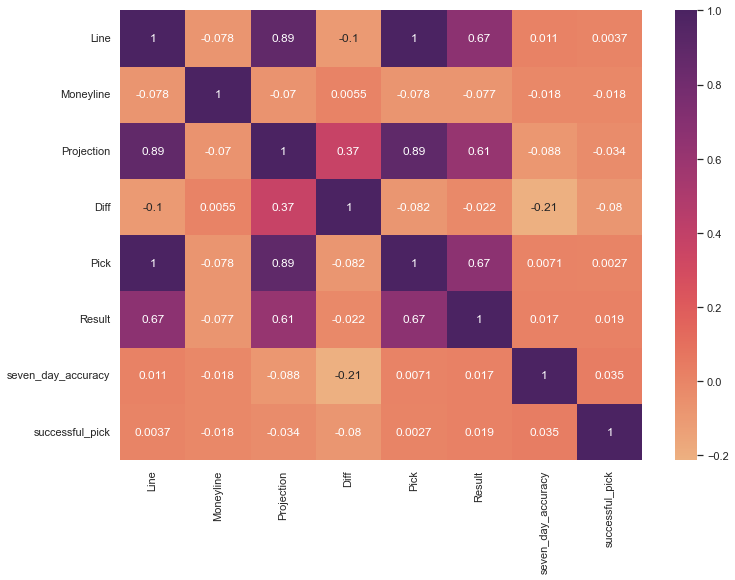

In [48]:
sns.heatmap(data=df.corr(), cmap='flare', annot=True)

In [49]:
lr = LinearRegression()

In [50]:
y = ohe_df.Result

In [51]:
y

0       11
1        5
2       14
3       14
4       13
        ..
4621    21
4622     3
4623     4
4624     2
4625     2
Name: Result, Length: 4626, dtype: int64

In [52]:
X = ohe_df.drop(['Result', 'Date', 'Name'], axis=1)

In [53]:
X

,Line,Moneyline,Projection,Diff,Pick,seven_day_accuracy,team_is_BKN,team_is_BOS,team_is_CHA,team_is_CHI,team_is_CLE,team_is_DAL,team_is_DEN,team_is_DET,team_is_GSW,team_is_HOU,team_is_IND,team_is_LAC,team_is_LAL,team_is_MEM,team_is_MIA,team_is_MIL,team_is_MIN,team_is_NOR,team_is_NYK,team_is_OKC,team_is_ORL,team_is_PHI,team_is_PHO,team_is_POR,team_is_SAC,team_is_SAS,team_is_TOR,team_is_UTH,team_is_WAS,is_F,is_F-C,is_F-G,is_G,opp_is_BKN,opp_is_BOS,opp_is_CHA,opp_is_CHI,opp_is_CLE,opp_is_DAL,opp_is_DEN,opp_is_DET,opp_is_GSW,opp_is_HOU,opp_is_IND,opp_is_LAC,opp_is_LAL,opp_is_MEM,opp_is_MIA,opp_is_MIL,opp_is_MIN,opp_is_NOR,opp_is_NYK,opp_is_OKC,opp_is_ORL,opp_is_PHI,opp_is_PHO,opp_is_POR,opp_is_SAC,opp_is_SAS,opp_is_TOR,opp_is_UTH,opp_is_WAS,is_Home,is_Under,is_1
0,15.5,-115,16.57,1.07,16.0,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,14.5,-115,15.29,0.79,14.5,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15.5,-115,12.85,-2.65,13.5,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,12.5,-105,16.72,4.22,12.5,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,12.5,-113,15.71,3.21,12.5,0.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,5.5,-105,2.91,-2.59,5.5,0.55,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4622,7.5,115,3.35,-4.15,7.5,0.51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4623,5.5,-130,4.33,-1.17,5.5,0.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4624,8.5,-105,6.11,-2.39,8.5,0.58,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [54]:
lr.fit(X,y)

LinearRegression()

In [ ]:
preds = lr.predict(X)

In [ ]:
cf_matrix = confusion_matrix(y, preds)

In [55]:
lr.score(X,y)

0.45548365142702363

In [57]:
lr.intercept_

-0.22263631812118234

In [58]:
lr.coef_

array([ 3.33228829e+01, -3.27164009e-03, -3.29476512e+01,  3.30652754e+01,
        5.92349765e-01,  2.63729498e+00, -1.68213311e-01, -2.35265524e-01,
        8.67821767e-01, -1.99118064e-01, -2.78103760e-02, -5.53258478e-01,
       -1.15807372e+00, -1.42612863e-01, -3.25039869e-01, -5.26190528e-01,
       -5.21091766e-01, -4.74774169e-01, -1.65882580e-01,  2.92578750e-01,
        3.95135278e-01,  1.40787444e-01, -4.96492464e-01,  1.53999067e-01,
       -8.71420504e-01, -8.58138067e-01,  2.80152259e-01, -8.92863057e-01,
        9.35841556e-02, -2.52390519e-01,  1.04938186e-02, -2.52768856e-01,
        4.85085006e-01, -5.69326248e-01, -1.07030210e+00,  9.22160075e-02,
        5.76539166e-01,  2.24926850e+00, -6.47381857e-02, -9.27220079e-01,
       -5.31749583e-01, -1.21436460e+00, -1.52418479e+00, -2.22356494e+00,
       -1.91062606e+00, -1.33020486e+00, -6.15362562e-01, -2.37490459e+00,
       -1.29732937e+00, -9.82534888e-01, -8.45914760e-01, -1.72588205e-01,
       -1.56891391e+00, -

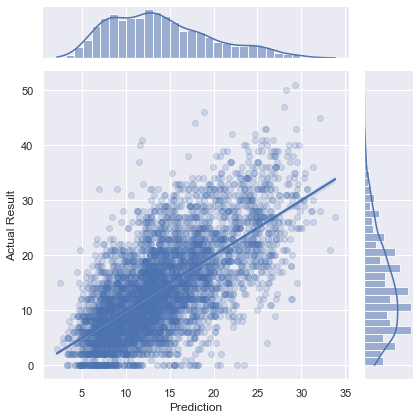

In [59]:
ax = sns.jointplot(x=preds, y=y, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)})
ax.set_axis_labels(xlabel='Prediction', ylabel='Actual Result')
plt.tight_layout()
plt.show()

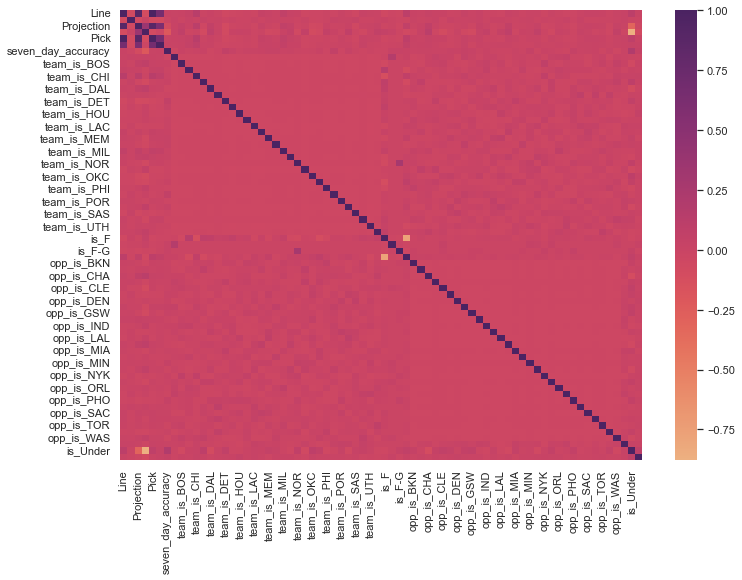

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(data=ohe_df.corr(), cmap='flare')